In [1]:
# glycosolation predictions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# needed to clean up the ends of the file
'''with open('../data/processed/glycosolation_predictions.txt','r') as f:
    lines = f.readlines()
    lines = [l.strip() for l in lines]
with open('../data/processed/glycosolation_predictions.txt','w') as f:
    for l in lines: 
        f.write(l+'\n')'''



"with open('../data/processed/glycosolation_predictions.txt','r') as f:\n    lines = f.readlines()\n    lines = [l.strip() for l in lines]\nwith open('../data/processed/glycosolation_predictions.txt','w') as f:\n    for l in lines: \n        f.write(l+'\n')"

## SARS

In [2]:

with open('data/SARS_glycosolation_sites.txt','r') as f:
    lines = f.readlines()


In [3]:
# type(lines) # list
# lines
lines[0]

'FIRST_3500_sp_P0C6U8_R1A_CVHSA   48 NGTC   0.6550     (8/9)   +     \n'

In [4]:
lines[0].split(' ')

['FIRST_3500_sp_P0C6U8_R1A_CVHSA',
 '',
 '',
 '48',
 'NGTC',
 '',
 '',
 '0.6550',
 '',
 '',
 '',
 '',
 '(8/9)',
 '',
 '',
 '+',
 '',
 '',
 '',
 '',
 '\n']

In [133]:
glyco = []
for l in lines: 
    temp = []
    for sp in l.split(' '):
        if len(sp)>0:
            temp.append(sp)
    glyco.append(temp)
    
df = pd.DataFrame(glyco).loc[:, 0:3]

In [134]:
# glyco
# df.shape # (90, 4)
df

,0,1,2,3
0,FIRST_3500_sp_P0C6U8_R1A_CVHSA,48,NGTC,0.6550
1,FIRST_3500_sp_P0C6U8_R1A_CVHSA,389,NHSN,0.6288
2,FIRST_3500_sp_P0C6U8_R1A_CVHSA,556,NHSI,0.4631
3,FIRST_3500_sp_P0C6U8_R1A_CVHSA,916,NFSS,0.5916
4,FIRST_3500_sp_P0C6U8_R1A_CVHSA,1628,NHTK,0.5662
...,...,...,...,...
85,sp_P59632_AP3A_CVHSA,227,NATF,0.6328
86,sp_P59636_ORF9B_CVHSA,4,NQTN,0.6981
87,sp_P59637_VEMP_CVHSA,48,NVSL,0.6514
88,sp_P59637_VEMP_CVHSA,66,NSSE,0.5880


In [135]:
#df = pd.read_csv('../data/processed/SARS_glycosolation_sites.txt', sep=' ', header=None)
df.columns =['protein', 'position', 'seq', 'prob_of_glyco']
df.head()
# df

,protein,position,seq,prob_of_glyco
0,FIRST_3500_sp_P0C6U8_R1A_CVHSA,48,NGTC,0.6550
1,FIRST_3500_sp_P0C6U8_R1A_CVHSA,389,NHSN,0.6288
2,FIRST_3500_sp_P0C6U8_R1A_CVHSA,556,NHSI,0.4631
3,FIRST_3500_sp_P0C6U8_R1A_CVHSA,916,NFSS,0.5916
4,FIRST_3500_sp_P0C6U8_R1A_CVHSA,1628,NHTK,0.5662


In [136]:
df.protein.unique()

array(['FIRST_3500_sp_P0C6U8_R1A_CVHSA',
       'LAST_3470_ONWARDS_sp_P0C6U8_R1A_CVHSA',
       'FIRST_3500_sp_P0C6X7_R1AB_CVHSA',
       'LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA', 'sp_P59594_SPIKE_CVHSA',
       'sp_P59595_NCAP_CVHSA', 'sp_P59596_VME1_CVHSA',
       'sp_P59632_AP3A_CVHSA', 'sp_P59636_ORF9B_CVHSA',
       'sp_P59637_VEMP_CVHSA', 'sp_Q80H93_NS8B_CVHSA'], dtype=object)

In [137]:
df[df.protein == 'FIRST_3500_sp_P0C6U8_R1A_CVHSA']

,protein,position,seq,prob_of_glyco
0,FIRST_3500_sp_P0C6U8_R1A_CVHSA,48,NGTC,0.6550
1,FIRST_3500_sp_P0C6U8_R1A_CVHSA,389,NHSN,0.6288
2,FIRST_3500_sp_P0C6U8_R1A_CVHSA,556,NHSI,0.4631
3,FIRST_3500_sp_P0C6U8_R1A_CVHSA,916,NFSS,0.5916
4,FIRST_3500_sp_P0C6U8_R1A_CVHSA,1628,NHTK,0.5662
5,FIRST_3500_sp_P0C6U8_R1A_CVHSA,1696,NKTV,0.5339
6,FIRST_3500_sp_P0C6U8_R1A_CVHSA,1899,NASF,0.4031
7,FIRST_3500_sp_P0C6U8_R1A_CVHSA,2031,NPTI,0.5314
8,FIRST_3500_sp_P0C6U8_R1A_CVHSA,2079,NTSI,0.3818
9,FIRST_3500_sp_P0C6U8_R1A_CVHSA,2249,NSSN,0.6307


In [138]:
df[df.protein == 'LAST_3470_ONWARDS_sp_P0C6U8_R1A_CVHSA']

,protein,position,seq,prob_of_glyco
19,LAST_3470_ONWARDS_sp_P0C6U8_R1A_CVHSA,250,NYSG,0.6084
20,LAST_3470_ONWARDS_sp_P0C6U8_R1A_CVHSA,680,NNSK,0.4486
21,LAST_3470_ONWARDS_sp_P0C6U8_R1A_CVHSA,763,NATE,0.7020
22,LAST_3470_ONWARDS_sp_P0C6U8_R1A_CVHSA,770,NSTV,0.4677


In [139]:
# nothing to account for in the first protein
df.loc[df.protein == 'LAST_3470_ONWARDS_sp_P0C6U8_R1A_CVHSA', 
       'position'] = df.loc[df.protein == 'LAST_3470_ONWARDS_sp_P0C6U8_R1A_CVHSA', 'position'].astype(int) + 3470

In [140]:
df[df.protein == 'FIRST_3500_sp_P0C6X7_R1AB_CVHSA']

,protein,position,seq,prob_of_glyco
23,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,48,NGTC,0.6550
24,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,389,NHSN,0.6288
25,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,556,NHSI,0.4631
26,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,916,NFSS,0.5916
27,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,1628,NHTK,0.5662
28,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,1696,NKTV,0.5339
29,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,1899,NASF,0.4031
30,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,2031,NPTI,0.5314
31,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,2079,NTSI,0.3818
32,FIRST_3500_sp_P0C6X7_R1AB_CVHSA,2249,NSSN,0.6307


In [141]:
df[df.protein == 'LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA']

,protein,position,seq,prob_of_glyco
42,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,250,NYSG,0.5753
43,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,680,NNSK,0.4829
44,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,763,NATE,0.7437
45,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,770,NSTV,0.5182
46,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,1546,NLSH,0.6070
47,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,1810,NTSR,0.5154
48,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,1933,NVTD,0.7133
49,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,2088,NISD,0.6881
50,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,2180,NSTL,0.5790
51,LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA,2435,NVTG,0.6442


In [142]:
# nothing to account for in the second protein
df.loc[df.protein == 'LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA', 
       'position'] = df.loc[df.protein == 'LAST_3470_ONWARDS_sp_P0C6X7_R1AB_CVHSA', 'position'].astype(int) + 3470

In [143]:
# account for pdb 0 indexing
df.position = df.position.astype(int)-1

In [144]:
# removing these labels on all of the names. 

def fixNames(x):
    
    if 'FIRST_3500' in x: 
        return '_'.join(x.split('_')[2:])
        
    elif 'LAST_3470' in x: 
        return '_'.join(x.split('_')[3:])
    else:
        return x
        
df.protein = df.protein.apply(fixNames)

In [145]:
df.iloc[40:50]

,protein,position,seq,prob_of_glyco
40,sp_P0C6X7_R1AB_CVHSA,3372,NHTI,0.4048
41,sp_P0C6X7_R1AB_CVHSA,3381,NGSC,0.3851
42,sp_P0C6X7_R1AB_CVHSA,3719,NYSG,0.5753
43,sp_P0C6X7_R1AB_CVHSA,4149,NNSK,0.4829
44,sp_P0C6X7_R1AB_CVHSA,4232,NATE,0.7437
45,sp_P0C6X7_R1AB_CVHSA,4239,NSTV,0.5182
46,sp_P0C6X7_R1AB_CVHSA,5015,NLSH,0.6070
47,sp_P0C6X7_R1AB_CVHSA,5279,NTSR,0.5154
48,sp_P0C6X7_R1AB_CVHSA,5402,NVTD,0.7133
49,sp_P0C6X7_R1AB_CVHSA,5557,NISD,0.6881


In [146]:
df.head()

,protein,position,seq,prob_of_glyco
0,sp_P0C6U8_R1A_CVHSA,47,NGTC,0.6550
1,sp_P0C6U8_R1A_CVHSA,388,NHSN,0.6288
2,sp_P0C6U8_R1A_CVHSA,555,NHSI,0.4631
3,sp_P0C6U8_R1A_CVHSA,915,NFSS,0.5916
4,sp_P0C6U8_R1A_CVHSA,1627,NHTK,0.5662


In [147]:
from Bio import SeqIO
from Bio.Seq import Seq
with open('data/SARS_proteins.fasta', "rt") as handle:
    records = list(SeqIO.parse(handle, "fasta"))

In [148]:
records[0]

SeqRecord(seq=Seq('MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLV...FAV', SingleLetterAlphabet()), id='sp|P0C6U8|R1A_CVHSA', name='sp|P0C6U8|R1A_CVHSA', description='sp|P0C6U8|R1A_CVHSA Replicase polyprotein 1a OS=Human SARS coronavirus (SARS-CoV) (Severe acute respiratory syndrome coronavirus) OX=694009 GN=1a PE=1 SV=1', dbxrefs=[])

In [149]:
protein_to_id_map = dict()
for r in records: 
    protein_to_id_map[r.name.replace('|', '_')] = r.description.split('GN=')[-1].split(' ')[0]

In [150]:
protein_to_id_map

{'sp_P0C6U8_R1A_CVHSA': '1a',
 'sp_P0C6X7_R1AB_CVHSA': 'rep',
 'sp_P59594_SPIKE_CVHSA': 'S',
 'sp_P59595_NCAP_CVHSA': 'N',
 'sp_P59596_VME1_CVHSA': 'M',
 'sp_P59632_AP3A_CVHSA': '3a',
 'sp_P59633_NS3B_CVHSA': '3b',
 'sp_P59634_NS6_CVHSA': '6',
 'sp_P59635_NS7A_CVHSA': '7a',
 'sp_P59636_ORF9B_CVHSA': '9b',
 'sp_P59637_VEMP_CVHSA': 'E',
 'sp_Q7TFA0_NS8A_CVHSA': '8a',
 'sp_Q7TFA1_NS7B_CVHSA': '7b',
 'sp_Q7TLC7_Y14_CVHSA': 'ORF14',
 'sp_Q80H93_NS8B_CVHSA': '8b'}

In [151]:
df.protein = df.protein.apply(lambda x: protein_to_id_map[x] )

In [152]:
# need to clean up the names 
records[0]

SeqRecord(seq=Seq('MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLV...FAV', SingleLetterAlphabet()), id='sp|P0C6U8|R1A_CVHSA', name='sp|P0C6U8|R1A_CVHSA', description='sp|P0C6U8|R1A_CVHSA Replicase polyprotein 1a OS=Human SARS coronavirus (SARS-CoV) (Severe acute respiratory syndrome coronavirus) OX=694009 GN=1a PE=1 SV=1', dbxrefs=[])

In [153]:
df.head()
# df

,protein,position,seq,prob_of_glyco
0,1a,47,NGTC,0.6550
1,1a,388,NHSN,0.6288
2,1a,555,NHSI,0.4631
3,1a,915,NFSS,0.5916
4,1a,1627,NHTK,0.5662


In [154]:
df;

In [155]:
records[0][47:51] # this is 1a
# yep checks out. 

SeqRecord(seq=Seq('NGTC', SingleLetterAlphabet()), id='sp|P0C6U8|R1A_CVHSA', name='sp|P0C6U8|R1A_CVHSA', description='sp|P0C6U8|R1A_CVHSA Replicase polyprotein 1a OS=Human SARS coronavirus (SARS-CoV) (Severe acute respiratory syndrome coronavirus) OX=694009 GN=1a PE=1 SV=1', dbxrefs=[])

In [156]:
df.tail()

,protein,position,seq,prob_of_glyco
85,3a,226,NATF,0.6328
86,9b,3,NQTN,0.6981
87,E,47,NVSL,0.6514
88,E,65,NSSE,0.5880
89,8b,42,NVTI,0.6713


In [157]:
print(records[-1]) # this is 8b
print('####')
print(records[-1][42:46])

ID: sp|Q80H93|NS8B_CVHSA
Name: sp|Q80H93|NS8B_CVHSA
Description: sp|Q80H93|NS8B_CVHSA Non-structural protein 8b OS=Human SARS coronavirus (SARS-CoV) (Severe acute respiratory syndrome coronavirus) OX=694009 GN=8b PE=4 SV=1
Number of features: 0
Seq('MCLKILVRYNTRGNTYSTAWLCALGKVLPFHRWHTMVQTCTPNVTINCQDPAGG...RTN', SingleLetterAlphabet())
####
ID: sp|Q80H93|NS8B_CVHSA
Name: sp|Q80H93|NS8B_CVHSA
Description: sp|Q80H93|NS8B_CVHSA Non-structural protein 8b OS=Human SARS coronavirus (SARS-CoV) (Severe acute respiratory syndrome coronavirus) OX=694009 GN=8b PE=4 SV=1
Number of features: 0
Seq('NVTI', SingleLetterAlphabet())


In [59]:
df.to_csv('data/SARS_glycosolation_sites_processed.csv', index=False)

#### Adding these onto the epitopes using code from "Combining all Additional Vaccines"

In [158]:
df_epi = pd.read_csv('data/SARS_all_protein_epitopes.csv')

In [159]:
df_epi.head()
# df_epi

,Epitope,Protein,start_pos
0,MESLVLGV,1a,0
1,ESLVLGVN,1a,1
2,SLVLGVNE,1a,2
3,LVLGVNEK,1a,3
4,VLGVNEKT,1a,4


In [160]:
df_glyco = df

In [161]:
df = df_epi

In [162]:
df['epi_len'] = df.Epitope.apply(lambda x: len(x))

In [163]:
df.head()

,Epitope,Protein,start_pos,epi_len
0,MESLVLGV,1a,0,8
1,ESLVLGVN,1a,1,8
2,SLVLGVNE,1a,2,8
3,LVLGVNEK,1a,3,8
4,VLGVNEKT,1a,4,8


In [164]:
df_glyco.head()
# df_glyco

,protein,position,seq,prob_of_glyco
0,1a,47,NGTC,0.6550
1,1a,388,NHSN,0.6288
2,1a,555,NHSI,0.4631
3,1a,915,NFSS,0.5916
4,1a,1627,NHTK,0.5662


In [165]:
df['glyco_probs'] = np.empty((len(df), 0)).tolist()
for i in range(len(df_glyco)):
    print('index',i)

    protein_mask = df.Protein==df_glyco.iloc[i].protein
    seq_start = df['start_pos']
    seq_end = df['start_pos']+df['epi_len']
    in_region = np.logical_and(df_glyco.iloc[i].position >= seq_start,df_glyco.iloc[i].position <= seq_end)
    in_region_and_protein = np.logical_and(protein_mask,in_region)
    
    df.loc[in_region_and_protein,'glyco_probs'] = df[in_region_and_protein]['glyco_probs'].apply(lambda x: x + [df_glyco.iloc[i].prob_of_glyco])
    #apply protein mask and then epitope mask


index 0
index 1
index 2
index 3
index 4
index 5
index 6
index 7
index 8
index 9
index 10
index 11
index 12
index 13
index 14
index 15
index 16
index 17
index 18
index 19
index 20
index 21
index 22
index 23
index 24
index 25
index 26
index 27
index 28
index 29
index 30
index 31
index 32
index 33
index 34
index 35
index 36
index 37
index 38
index 39
index 40
index 41
index 42
index 43
index 44
index 45
index 46
index 47
index 48
index 49
index 50
index 51
index 52
index 53
index 54
index 55
index 56
index 57
index 58
index 59
index 60
index 61
index 62
index 63
index 64
index 65
index 66
index 67
index 68
index 69
index 70
index 71
index 72
index 73
index 74
index 75
index 76
index 77
index 78
index 79
index 80
index 81
index 82
index 83
index 84
index 85
index 86
index 87
index 88
index 89


In [166]:
df.head()

,Epitope,Protein,start_pos,epi_len,glyco_probs
0,MESLVLGV,1a,0,8,[]
1,ESLVLGVN,1a,1,8,[]
2,SLVLGVNE,1a,2,8,[]
3,LVLGVNEK,1a,3,8,[]
4,VLGVNEKT,1a,4,8,[]


In [167]:
df.glyco_probs.apply(lambda x: len(x)).sum()

27749

In [168]:
# binarizing glyco probs

df['glyco_probs'] = df.glyco_probs.apply(lambda x: 1.0 if len(x)>0 else 0.0)

In [169]:
df.head()

,Epitope,Protein,start_pos,epi_len,glyco_probs
0,MESLVLGV,1a,0,8,0.0
1,ESLVLGVN,1a,1,8,0.0
2,SLVLGVNE,1a,2,8,0.0
3,LVLGVNEK,1a,3,8,0.0
4,VLGVNEKT,1a,4,8,0.0


In [170]:
df.shape

(254601, 5)

In [171]:
df

,Epitope,Protein,start_pos,epi_len,glyco_probs
0,MESLVLGV,1a,0,8,0.0
1,ESLVLGVN,1a,1,8,0.0
2,SLVLGVNE,1a,2,8,0.0
3,LVLGVNEK,1a,3,8,0.0
4,VLGVNEKT,1a,4,8,0.0
...,...,...,...,...,...
254596,LIARCWYLHEGHQTAAFRDVLVVLN,8b,55,25,0.0
254597,IARCWYLHEGHQTAAFRDVLVVLNK,8b,56,25,0.0
254598,ARCWYLHEGHQTAAFRDVLVVLNKR,8b,57,25,0.0
254599,RCWYLHEGHQTAAFRDVLVVLNKRT,8b,58,25,0.0


In [172]:
df.to_csv('data/processed/SARS_epitopes_and_glyco_binary.csv', index=False)

## Covid

In [173]:
df = pd.read_csv('data/glycosolation_predictions.txt', sep=' ', header=None)
df.head()
# df

,0,1,2,3
0,Wuhan_IPBCAMS-WH-01_2019_E,48,NVSL,0.6507
1,Wuhan_IPBCAMS-WH-01_2019_E,66,NSSR,0.6339
2,Wuhan_IPBCAMS-WH-01_2019_M,5,NGTI,0.7577
3,Wuhan_IPBCAMS-WH-01_2019_N,47,NNTA,0.6798
4,Wuhan_IPBCAMS-WH-01_2019_N,77,NSSP,0.2149


In [174]:
df.columns =['protein', 'position', 'seq', 'prob_of_glyco']
df.head()

,protein,position,seq,prob_of_glyco
0,Wuhan_IPBCAMS-WH-01_2019_E,48,NVSL,0.6507
1,Wuhan_IPBCAMS-WH-01_2019_E,66,NSSR,0.6339
2,Wuhan_IPBCAMS-WH-01_2019_M,5,NGTI,0.7577
3,Wuhan_IPBCAMS-WH-01_2019_N,47,NNTA,0.6798
4,Wuhan_IPBCAMS-WH-01_2019_N,77,NSSP,0.2149


In [175]:
# ORF1a was too large so I had to split it in half. worried I would miss the center of it I also 
# included a section that is right down the middle. 
# length of ORF1a is 4401 split into 2 parts, 2200 and 2201 long. 
# made sure the middle split didnt have anything in it. 

In [176]:
df.loc[df.protein== 'PART2_Wuhan_IPBCAMS-WH-01_2019_ORF1a', 
       'position'] = df.loc[df.protein== 'PART2_Wuhan_IPBCAMS-WH-01_2019_ORF1a', 
       'position'] + 2200



In [177]:
# getting rid of the part one and part 2 labels
df['protein'] = df.protein.apply(lambda x: '_'.join(x.split('_')[1:]) if 'PART' in x else x)


In [178]:
df['protein'] = df.protein.apply(lambda x:x.split('_')[-1]) 


In [179]:
df.head()

,protein,position,seq,prob_of_glyco
0,E,48,NVSL,0.6507
1,E,66,NSSR,0.6339
2,M,5,NGTI,0.7577
3,N,47,NNTA,0.6798
4,N,77,NSSP,0.2149


In [180]:
df[df.protein=='S']
# df

,protein,position,seq,prob_of_glyco
55,S,17,NLTT,0.6606
56,S,61,NVTW,0.7820
57,S,74,NGTK,0.7192
58,S,122,NATN,0.6781
59,S,149,NKSW,0.6318
60,S,165,NCTF,0.6220
61,S,234,NITR,0.7613
62,S,282,NGTI,0.7378
63,S,331,NITN,0.5970
64,S,343,NATR,0.5671


In [181]:
amino_acid_files = !ls data/v6/*_protein_*
amino_acid_files;

In [182]:
from Bio import SeqIO
from Bio.Seq import Seq

In [183]:
for aa_file in ['data/v6/aligned_protein_S.fasta']:
    protein = aa_file.split('_')[-1].split('.')[0]
    
    #if protein not in glyco_proteins: 
    #    continue
        
    #print(protein)
    with open(aa_file, "rt") as handle:
        records = list(SeqIO.parse(handle, "fasta"))
    protein_len = len(records[0].seq)

In [184]:
str(records[0].seq)[1194:1198]

'ESLI'

In [185]:
glyco_proteins = df.protein.unique().tolist()
glyco_proteins

['E', 'M', 'N', 'ORF1a', 'ORF1b', 'ORF6', 'ORF7b', 'ORF8', 'S']

In [186]:
# probs

In [187]:
records[0].seq

Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...YT*', SingleLetterAlphabet())

In [188]:
(df[df.protein=='S'].prob_of_glyco >0.3).sum()

22

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
2 1
2 2
2 3


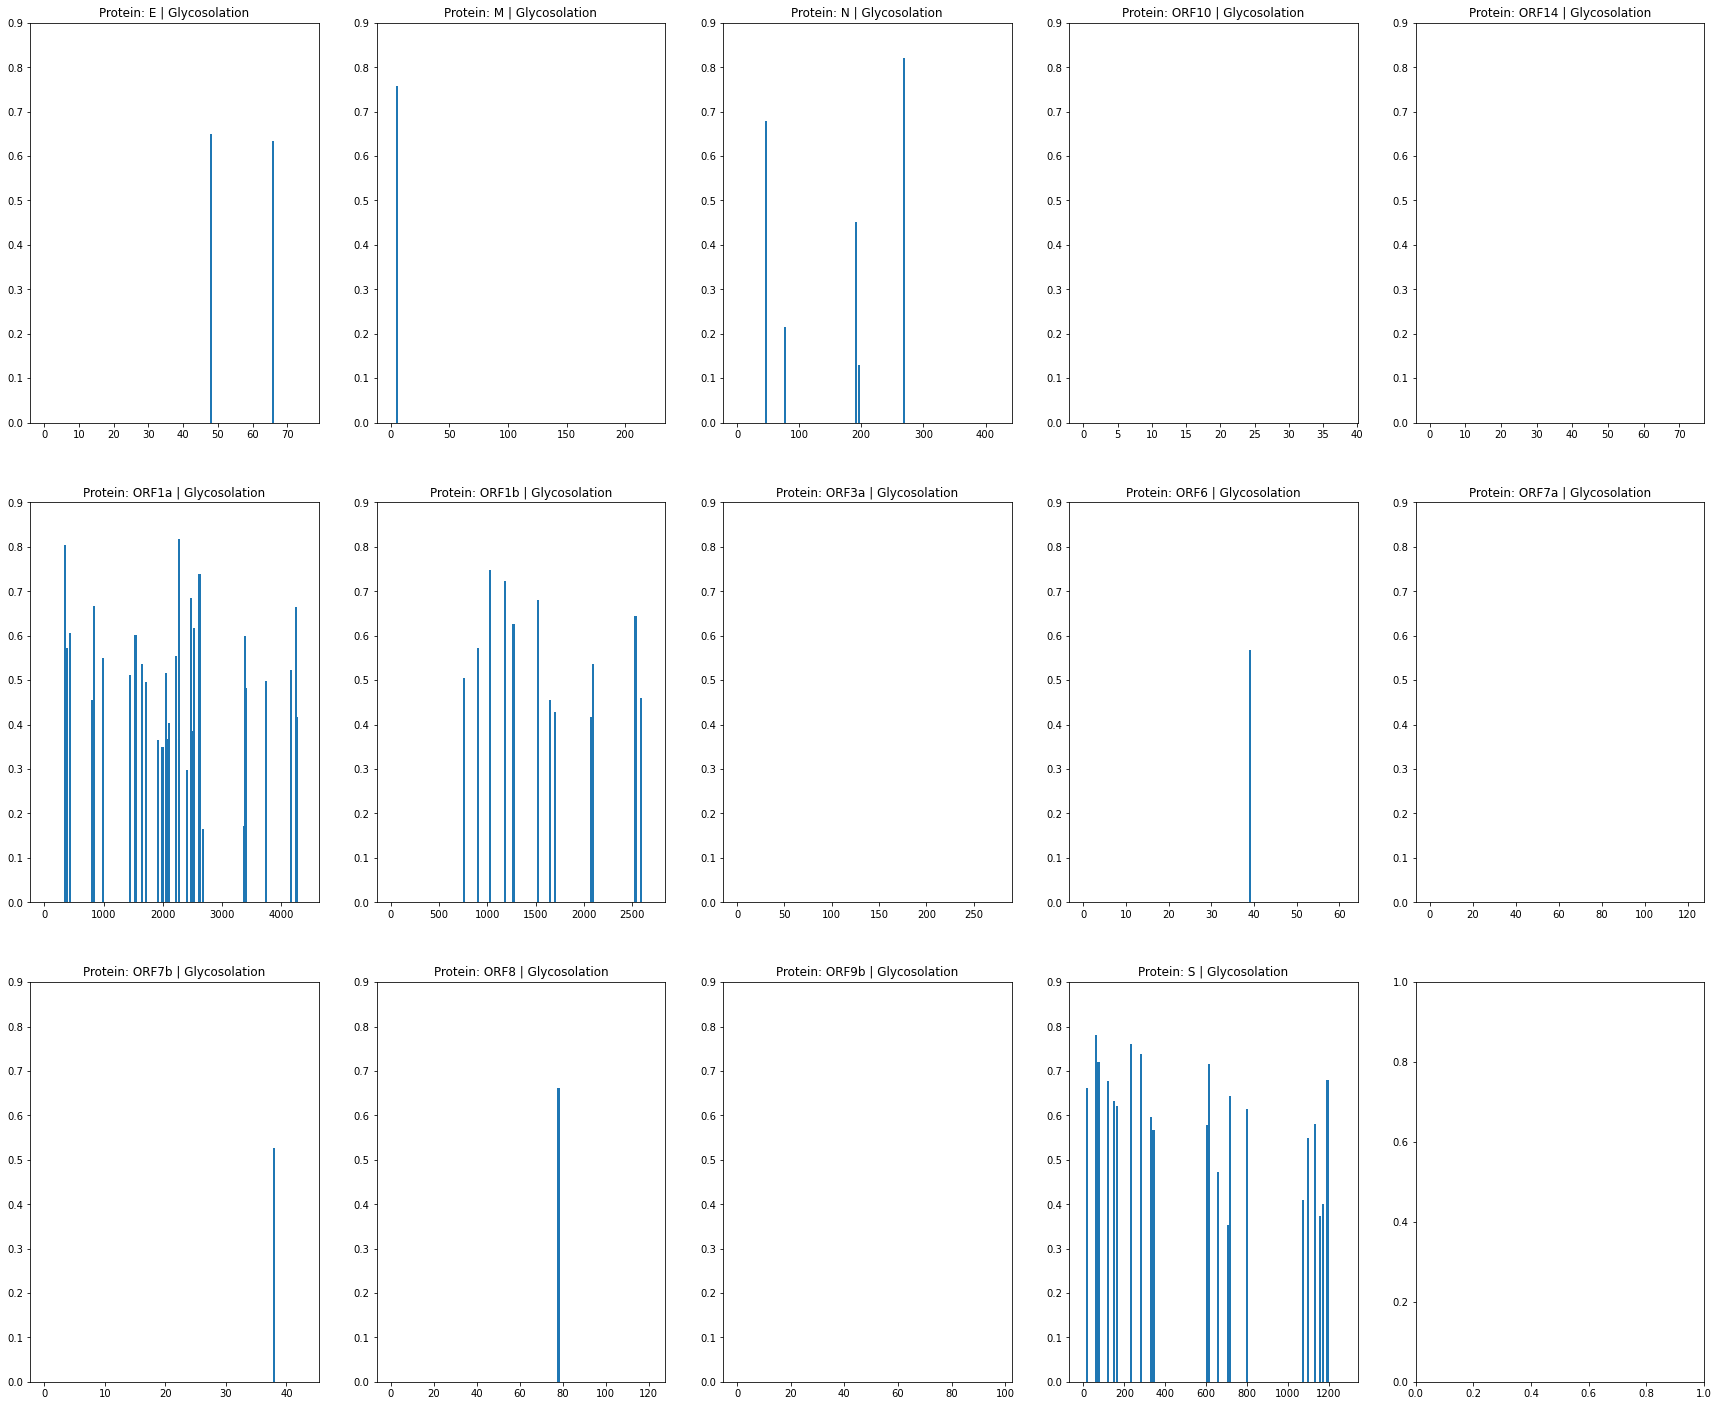

In [103]:
all_to_plot = []
for aa_file in amino_acid_files:
    protein = aa_file.split('_')[-1].split('.')[0]
    
    #if protein not in glyco_proteins: 
    #    continue
        
    #print(protein)
    with open(aa_file, "rt") as handle:
        records = list(SeqIO.parse(handle, "fasta"))
    protein_len = len(records[0].seq)
    
    pos = df[df.protein==protein].position.to_list()
    probs = df[df.protein==protein].prob_of_glyco.to_list()
    
    to_plot = np.zeros(protein_len)
    for ind in range(len(pos)): 
        to_plot[ pos[ind] ] = probs[ind]
    '''wid = protein_len / 120
    plt.figure()
    #plt.axhline(0.5, color='red')
    plt.bar(np.arange(protein_len), to_plot, width=wid)
    plt.title('Glycosolation | Protein: '+ protein)
    plt.show()'''
    all_to_plot.append(to_plot)
    
rows, cols = 3, 5
fig, ax = plt.subplots(rows,cols, figsize=(30,25))
for i, aa_file in enumerate(amino_acid_files):
    protein = aa_file.split('_')[-1].split('.')[0]

    x_ind = i//cols
    y_ind = i%cols
    print(x_ind, y_ind)
    wid = len(all_to_plot[i]) / 120
    ax[x_ind, y_ind].set_ylim(0, 0.9)
    ax[x_ind, y_ind].bar(np.arange(len(all_to_plot[i])), 
                         all_to_plot[i], width=wid)
    
    ax[x_ind, y_ind].set_title('Protein: '+protein+' | Glycosolation')

In [189]:
# from this paper: https://www.biorxiv.org/content/10.1101/2020.03.28.013276v1.supplementary-material supporting info figure S5
# also checked for SARS and SARS2 (underlined) overlaps from Table 2 of this paper https://www.cell.com/cell/pdf/S0092-8674(20)30262-2.pdf?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867420302622%3Fshowall%3Dtrue
# * in front of all known and potential glycosolation sites
import numpy as np
insect_whole = 'MFVFLVLLPLVSSQCV*NLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFS*NVTWFHAIHVSGT*NGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVN*NATNVVIKVCEFQFCNDPFLGVYYHKN*NKSWMESEFRVYSSAN*NCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGI*NITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNE*NGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFP*NITNLCPFGEVF*NATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGT*NTSNQVAVLYQDV*NCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHV*NNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYS*NNSIAIPT*NFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGF*NFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEK*NFTTAPAICHDGKAHFPREGVFVS*NGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIV*NNTVYDPLQPELDSFKEELDKYFK*NHTSPDVDLGDISGI*NASVVNIQKEIDRLNEVAKNL*NESLIDLQELGKYEQYIKWPAHHHHHHHHHH'
human_s1 = 'MFVFLVLLPLVSSQCV*NLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFS*NVTWFHAIHVSGT*NGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVN*NATNVVIKVCEFQFCNDPFLGVYYHKN*NKSWMESEFRVYSSAN*NCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGI*NITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNE*NGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFP*NITNLCPFGEVF*NATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGT*NTSNQVAVLYQDV*NCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHV*NNSYECDIPIGAGICASYQTQTNSPRRARAHHHHHHHHHH'
print(len(insect_whole))
results = []
for dat in [insect_whole, human_s1]:
    positions = []
    temp = np.zeros(len(dat.replace('*','')))
    num_found = 0
    for ind, char in enumerate(dat): 
        if char=='*':
            temp[ind-num_found] = 1 # need to account for the sequence getting longer. 
            positions.append(ind-num_found)
            num_found+=1
    results.append(temp)
    results.append(positions)
    print(temp.sum())

1246
22.0
13.0


In [190]:
len(results)

4

In [191]:
num_found

13

In [192]:
table_2 = [17,61,74,122,149,165,234,282,331,343,603,616,657,709,717,801,1074,1098,1134,1158,1173,1194]

In [193]:
len(table_2)

22

In [194]:
results[1]

[16,
 60,
 73,
 121,
 148,
 164,
 233,
 281,
 330,
 342,
 602,
 615,
 656,
 708,
 716,
 800,
 1073,
 1097,
 1133,
 1157,
 1172,
 1193]

In [195]:
results[3]

[16, 60, 73, 121, 148, 164, 233, 281, 330, 342, 602, 615, 656]

In [196]:
results[3]

[16, 60, 73, 121, 148, 164, 233, 281, 330, 342, 602, 615, 656]

In [197]:
df[df.protein=='S']

,protein,position,seq,prob_of_glyco
55,S,17,NLTT,0.6606
56,S,61,NVTW,0.7820
57,S,74,NGTK,0.7192
58,S,122,NATN,0.6781
59,S,149,NKSW,0.6318
60,S,165,NCTF,0.6220
61,S,234,NITR,0.7613
62,S,282,NGTI,0.7378
63,S,331,NITN,0.5970
64,S,343,NATR,0.5671


In [198]:
positions

[16, 60, 73, 121, 148, 164, 233, 281, 330, 342, 602, 615, 656]

In [199]:
# accounts for 0 indexing
df.position = df.position.astype(int) -1 

In [200]:
records[0].seq

Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...YT*', SingleLetterAlphabet())

In [201]:
records[0].seq[results[0].astype(bool)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [202]:
insect_whole.index('*')
counter=0
positions = []
for ind, e in enumerate(insect_whole): 
    if e =='*':
        counter+=1
        positions.append(ind)
counter

22

In [204]:
positions

[16,
 61,
 75,
 124,
 152,
 169,
 239,
 288,
 338,
 351,
 612,
 626,
 668,
 721,
 730,
 815,
 1089,
 1114,
 1151,
 1176,
 1192,
 1214]

In [205]:
df[df.protein=='S']

,protein,position,seq,prob_of_glyco
55,S,16,NLTT,0.6606
56,S,60,NVTW,0.7820
57,S,73,NGTK,0.7192
58,S,121,NATN,0.6781
59,S,148,NKSW,0.6318
60,S,164,NCTF,0.6220
61,S,233,NITR,0.7613
62,S,281,NGTI,0.7378
63,S,330,NITN,0.5970
64,S,342,NATR,0.5671


In [206]:
human_s1.index('*')

16

In [207]:
proteins = df.protein.unique()
for p in proteins: 
    df[df.protein==p].position

In [208]:
df[df.protein=='S']

,protein,position,seq,prob_of_glyco
55,S,16,NLTT,0.6606
56,S,60,NVTW,0.7820
57,S,73,NGTK,0.7192
58,S,121,NATN,0.6781
59,S,148,NKSW,0.6318
60,S,164,NCTF,0.6220
61,S,233,NITR,0.7613
62,S,281,NGTI,0.7378
63,S,330,NITN,0.5970
64,S,342,NATR,0.5671


In [209]:
# checking something other than the S protein

for aa_file in ['data/v6/aligned_protein_M.fasta']:
    protein = aa_file.split('_')[-1].split('.')[0]
    
    #if protein not in glyco_proteins: 
    #    continue
        
    #print(protein)
    with open(aa_file, "rt") as handle:
        records = list(SeqIO.parse(handle, "fasta"))
    protein_len = len(records[0].seq)

In [210]:
str(records[0].seq)[4:8]

'NGTI'

In [212]:
df[df.protein=='M']

,protein,position,seq,prob_of_glyco
2,M,4,NGTI,0.7577


In [213]:
df.to_csv('data/processed/glycosolation_sites_processed.csv', index=False)

In [214]:
df = pd.read_csv('data/processed/glycosolation_sites_processed.csv')

In [215]:
df[df.protein=='S']

,protein,position,seq,prob_of_glyco
55,S,16,NLTT,0.6606
56,S,60,NVTW,0.7820
57,S,73,NGTK,0.7192
58,S,121,NATN,0.6781
59,S,148,NKSW,0.6318
60,S,164,NCTF,0.6220
61,S,233,NITR,0.7613
62,S,281,NGTI,0.7378
63,S,330,NITN,0.5970
64,S,342,NATR,0.5671
